<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='blue'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [1]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl' -O 'DIP_HW3_data.zip'
!unzip DIP_HW3_data.zip

--2023-12-22 18:59:43--  https://drive.google.com/uc?export=download&id=1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl
Resolving drive.google.com (drive.google.com)... 142.251.2.100, 142.251.2.113, 142.251.2.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bhh225umh0dtrs8dk83ih9282doqo4b9/1703271525000/14300142125693899780/*/1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl?e=download&uuid=372d60c3-ea0e-4a43-b87e-235ccc5bd533 [following]
--2023-12-22 18:59:43--  https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bhh225umh0dtrs8dk83ih9282doqo4b9/1703271525000/14300142125693899780/*/1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl?e=download&uuid=372d60c3-ea0e-4a43-b87e-235ccc5bd533
Resolving doc-00-1g-docs.googleusercontent.com (doc-00-1g-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b

# Imports
<div dir=rtl>
<font color="blue" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [2]:
###
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma
###

# Any Helper Functions

<div dir=rtl>
<font color="blue" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [3]:
###
def helperImshow(
    img,
    title: str,
    cmap: str = 'gray',
    vmin: int = 0,
    vmax: str = 255
):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(title, color='white', fontweight='bold', backgroundcolor='green')

    plt.axis('off')
    plt.show()

def helperImgesShow(
    imgs: dict, # {title: img}
    cmap: str = 'gray',
    vmin: int = 0,
    vmax: int = 255
):
    plt.figure(figsize=(30,10))

    i = 0
    for title, img in imgs.items():
        i = i + 1
        plt.subplot(2,5,i)
        plt.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.title(title, color='white', backgroundcolor='green')
        plt.axis('off')

###

# Question 3: Image Restoration (35%)

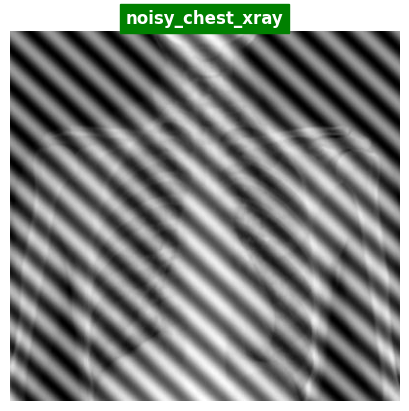

In [4]:
#@title Q3 - Part 1 (5%)
###
noisy_chest_xray = cv.imread("chest_xray.png", cv.IMREAD_GRAYSCALE)
helperImshow(noisy_chest_xray, "noisy_chest_xray")

###

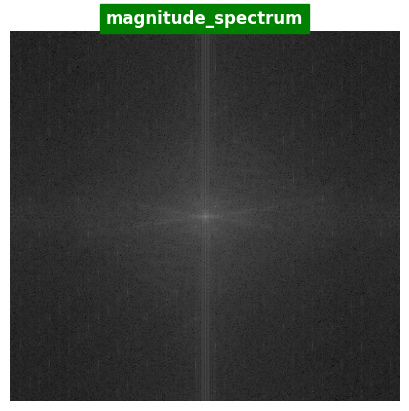

In [5]:
#@title Q3 - Part 2 (10%)
###
dft_chest = np.fft.fft2(noisy_chest_xray)
dft_shift = np.fft.fftshift(dft_chest)
magnitude_spectrum = 8 * np.log(np.abs(dft_shift))

helperImshow(magnitude_spectrum, "magnitude_spectrum")

###

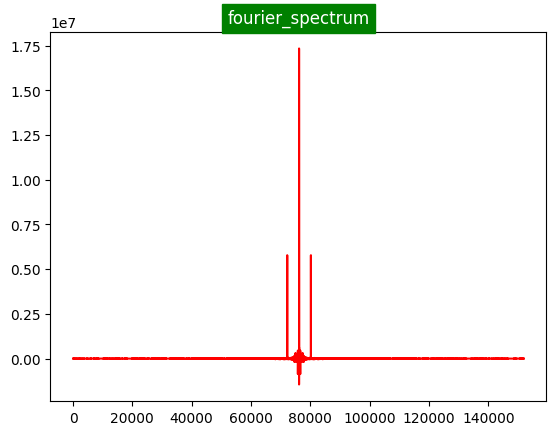

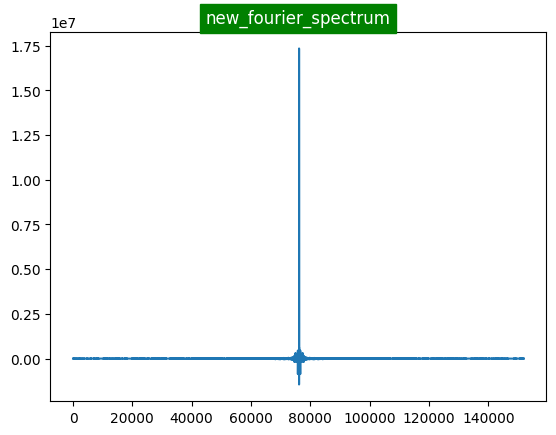

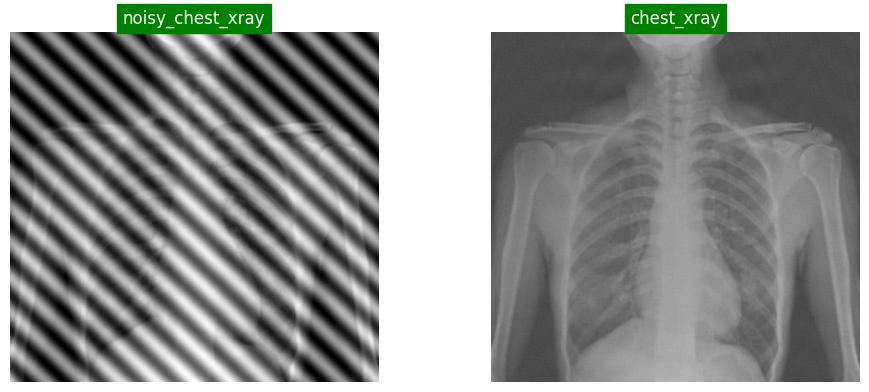

In [7]:
#@title Q3 - Part 3 (30%)

fourier_spectrum = dft_shift.flatten()
plt.plot(fourier_spectrum, color='red')
plt.title('fourier_spectrum', color='white', backgroundcolor='green')
plt.show()

# Create Notch Mask
mask = np.ones_like(fourier_spectrum)
mask[72000:72500] = 0.0
mask[80000:80500] = 0.0

# apply mask
new_fourier_spectrum = fourier_spectrum * mask
plt.plot(new_fourier_spectrum)
plt.title('new_fourier_spectrum', color='white', backgroundcolor='green')
plt.show()

# creating a new image to which a notch filter has been applied.
new_fourier = new_fourier_spectrum.reshape(dft_shift.shape)
chest_xray = np.fft.ifft2(np.fft.ifftshift(new_fourier)).real.clip(0,255).astype(np.uint8)


helperImgesShow(
    imgs={
        'noisy_chest_xray': noisy_chest_xray,
        'chest_xray': chest_xray
    }
)



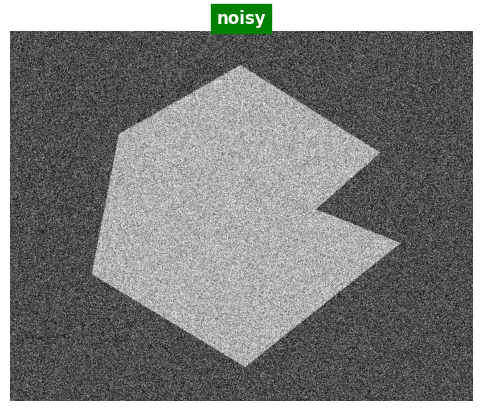

In [9]:
#@title Q3 - Part 4 (5%)
###
noisy_image = cv.imread("noisy.png", cv.IMREAD_GRAYSCALE)
helperImshow(noisy_image, "noisy")

###

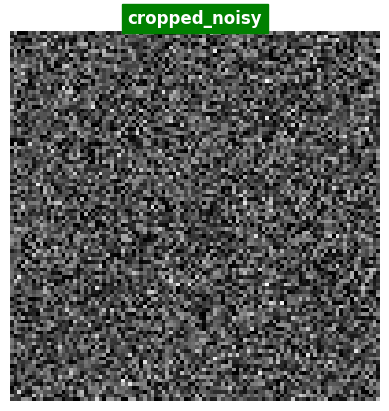

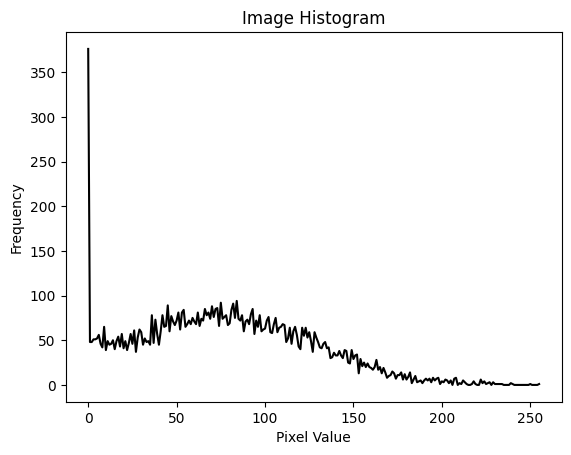

In [10]:
#@title Q3 - Part 5 (15%)
###

cropped_image = noisy_image[0:100, 0:100]
helperImshow(cropped_image, "cropped_noisy")

# Calculate the histogram
hist = cv.calcHist([cropped_image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()

###

In [11]:
#@title Q3 - Part 6 (15%)
###

def adaptive_filter(img):
    rows, cols = img.shape

    noise_variance = estimate_sigma(img) ** 2

    adaptive_filtered_image = np.copy(img)
    for r in range(2, rows-2):
        for c in range(2, cols-2):
            local_var = np.var(img[r-2:r+2, c-2:c+2])
            local_mean = np.mean(img[r-2:r+2, c-2:c+2])
            adaptive_filtered_image[r, c] = img[r, c] - ((noise_variance/local_var) * (img[r, c] - local_mean))

    return adaptive_filtered_image

adaptive_filtered_image = adaptive_filter(noisy_image)

###

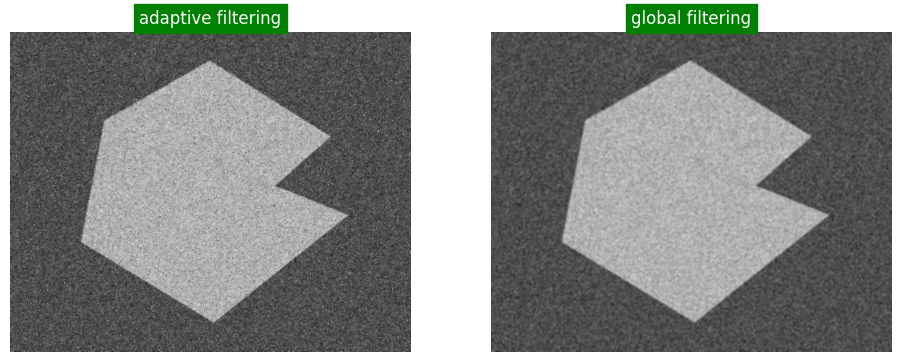

In [12]:
#@title Q3 - Part 7 (10%)
###
kernel_size = (5, 5)
mean_filtered_image = cv.blur(noisy_image, kernel_size)

helperImgesShow(
    imgs={
        'adaptive filtering': adaptive_filtered_image,
        'global filtering': mean_filtered_image
    }
)

###

<div dir=rtl><font color='green' size="5">جواب سوال ۳-۸</font>
<div>

<div dir=rtl><font size="4">
فیلتر میانگین گیری باعث تار شدن لبه ها می شود و در کل شکل را تار نشان میدهد در حالی که در فیلتر تطبیقی این اتفاق رخ نمیدهد و فیلتر متناسب باهر بخش عمل میکند.
 </font><br />
</div>

# Question 4: Morphology (35%)

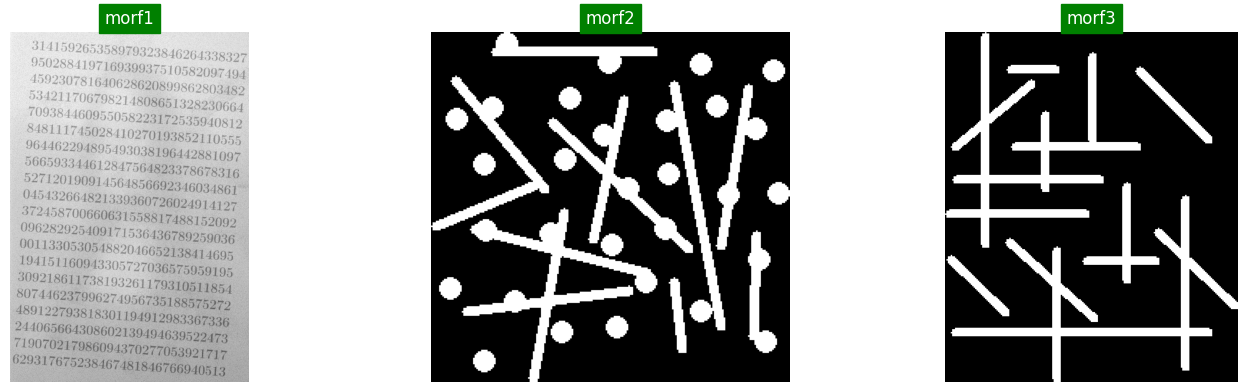

In [13]:
#@title Q4 - Part 1 (5%)
###
morf1 = cv.imread("morf1.png", cv.IMREAD_GRAYSCALE)
morf2 = cv.imread("morf2.png", cv.IMREAD_GRAYSCALE)
morf3 = cv.imread("morf3.png", cv.IMREAD_GRAYSCALE)

helperImgesShow(
    imgs={
        'morf1': morf1,
        'morf2': morf2,
        'morf3': morf3
    }
)

###

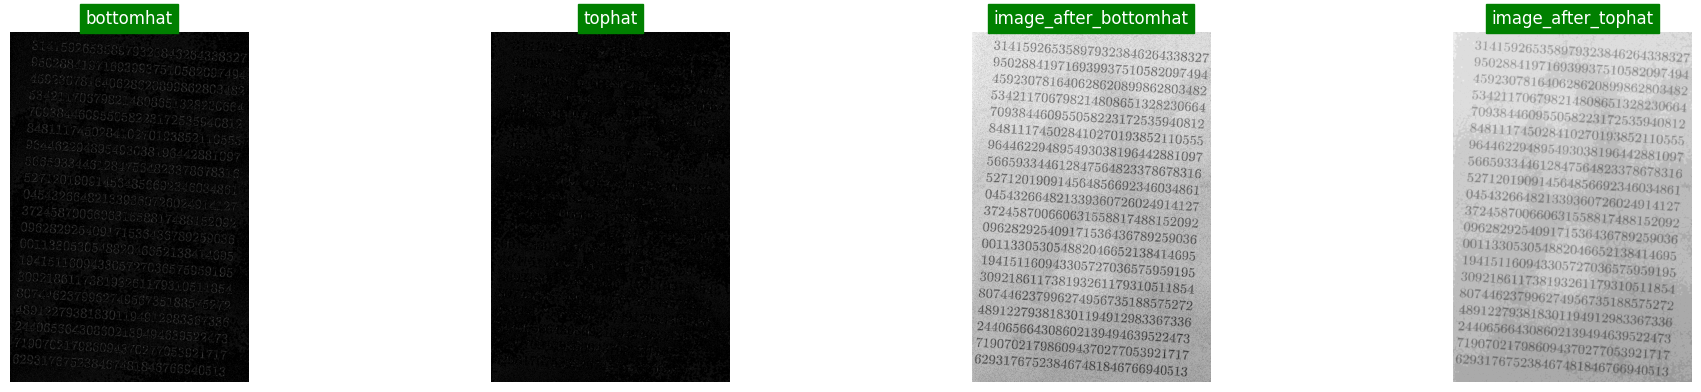

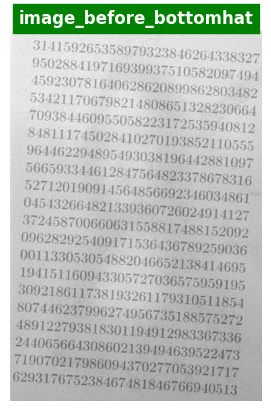

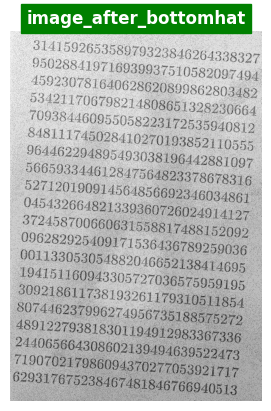

In [20]:
#@title Q4 - Part 2 (35%)
###
filterSize =(3, 3)
kernel = cv.getStructuringElement(cv.MORPH_RECT, filterSize)
bottomhat = cv.morphologyEx(morf1, cv.MORPH_BLACKHAT, kernel)
tophat = cv.morphologyEx(morf1, cv.MORPH_TOPHAT, kernel)

image_after_bottomhat = morf1 - bottomhat
image_after_tophat =  morf1 - tophat

helperImgesShow(
    imgs={
        'bottomhat': bottomhat,
        'tophat': tophat,
        'image_after_bottomhat': image_after_bottomhat,
        'image_after_tophat': image_after_tophat
    }
)

# the best one is bottom hat so -->

helperImshow(morf1, 'image_before_bottomhat')
helperImshow(image_after_bottomhat, 'image_after_bottomhat')

###

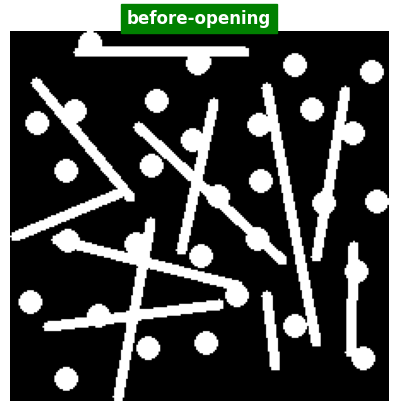

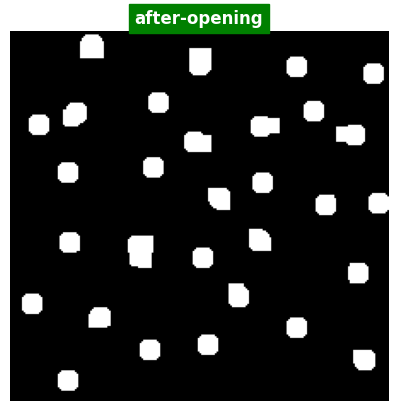

In [41]:
#@title Q4 - Part 3 (20%)
###
kernel = cv.getStructuringElement(cv.MORPH_RECT,(8,8))
opening = cv.morphologyEx(morf2, cv.MORPH_OPEN, kernel)

helperImshow(morf2, 'before-opening')
helperImshow(opening, 'after-opening')

###

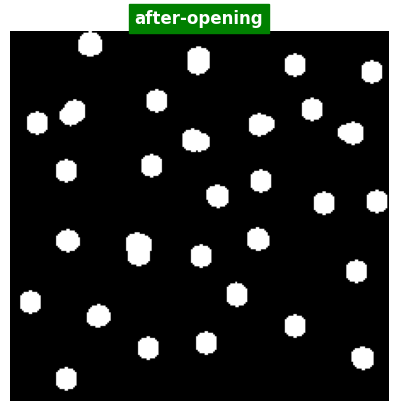

In [42]:
#@title Q4 - Part 4 (10%)
###
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(11,11))
opening = cv.morphologyEx(morf2, cv.MORPH_OPEN, kernel)

helperImshow(opening, 'after-opening')


###

<div dir=rtl><font color='green' size="5">## توضیحات سوال ۴-۴</font>
<div>

<div dir=rtl><font size="4">
چون کرنل ما مربعی بود پس دایره ها بصورت مربعی میشدند پس برای حل این مشکل از کرنل دایره ای استفاده شده است.
 </font><br />
</div>

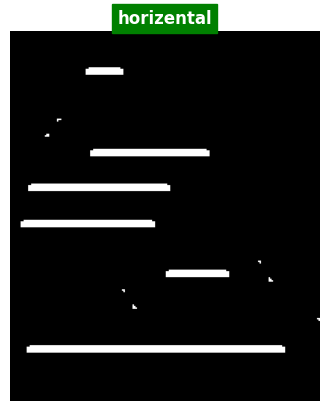

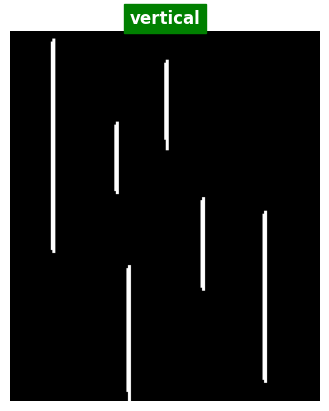

In [56]:
#@title Q4 - Part 5 (20%)
###

kernel_horizental = np.ones((2, 12), np.uint8)
horizental = cv.erode(morf3, kernel_horizental)
helperImshow(horizental, 'horizental')

kernel_vertical = np.ones((9, 4), np.uint8)
vertical = cv.erode(morf3, kernel_vertical)
helperImshow(vertical, 'vertical')

###

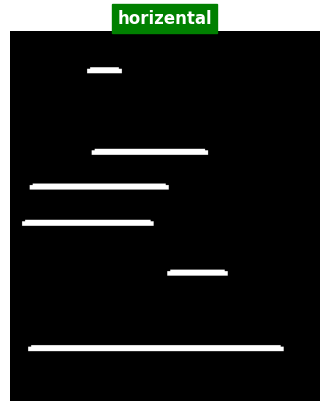

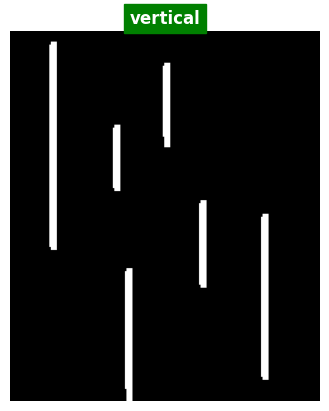

In [50]:
#@title Q4 - Part 6 (10%)
###

kernel_horizental = np.ones((3, 14), np.uint8)
horizental = cv.erode(morf3, kernel_horizental)
helperImshow(horizental, 'horizental')

kernel_vertical = np.ones((13, 2), np.uint8)
vertical = cv.erode(morf3, kernel_vertical)
helperImshow(vertical, 'vertical')


###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال  ۴-۶</font>
<div>
<font size="4">
اعداد کرنل قبلی مناسب نبودند پس برای حل مشکل اعداد کرنل را مناسب انتخاب کردیم.
 </font><br />
</div>

<div dir=rtl>
<font color='yellow' size = "7">	ملاحظات
</font>

</div>
<div dir=rtl>
<font size = "4">	** توجه داشتید باشید کولب خود را بصورت viewer به اشتراک بگذارید. (بالا سمت راست دکمه Share قرار دارد که موقع فشردن آن یک صفحه باز می‌شود و گزینه‌ای که بصورت پیشفرض نوشته restricted را تغییر دهید)
</font>
</div>

<div dir=rtl>
<font size = "4">	**	لطفاً بعد از تحویل تمرین دیگر کد گوگل کولب خود را باز نکنید و حتی کوچکترین تغییری (حتی در حد ایجاد یک space) در آن ندهید.(چرا که تاریخ آخرین ویرایش آن تغییر کرده و برای مصحح محترم قابل احراز نیست که این کد شما چه زمانی نوشته شده است (از نظر موعد قابل پذیرش برای تحویل) و بخش کدنویسی آن تمرین از شما پذیرفته نخواهد شد)

</font>
</div>

<div dir=rtl>
<font size = "4"> **	نحوه ارسال تمارین: PDF حل تمارین تشریحی به همراه کدهای نوشته شده (اشتراک لینک گوگل کولب شما (داخل Notepad و ابتدای گزارش تشریحی) + تحویل pdf پرینت آن + دانلود .ipynb آن) در قالب یک فایل فشرده zip به اسم HW0_Num باشند که Num شماره دانشجویی شما است مانند HW0_400133001 و فقط از طریق سامانه ی مدیریت یادگیری Courses ارسال بفرمایید. با آرزوی موفقیت برای شما  
</font>
</div>